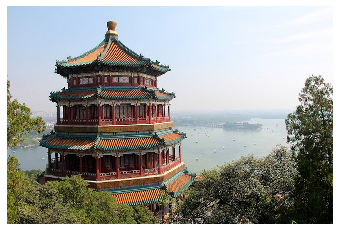

In [1]:
# Note: this requires the ``pillow`` package to be installed
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [2]:
# The image itself is stored in a three-dimensional array of size (height, width, RGB), 
# containing red/blue/green contributions as integers from 0 to 255:
china.shape

(427, 640, 3)

In [6]:
# One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.

data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [7]:
# We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:
import numpy as np
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng =-ata.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

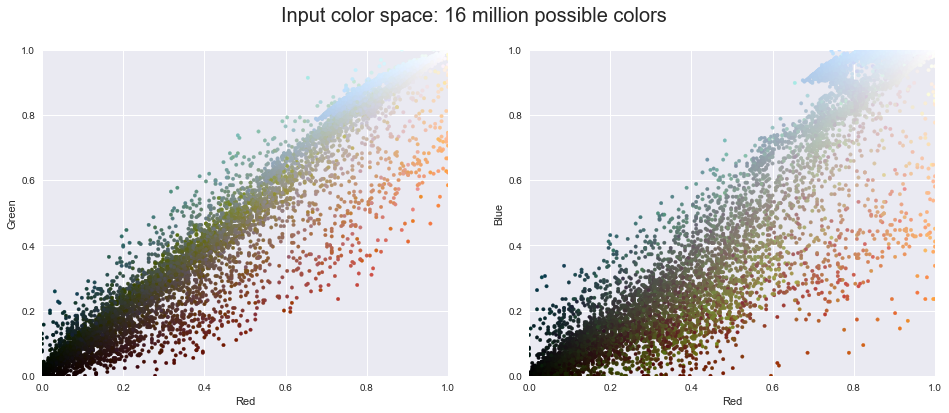

In [8]:
# There are three colors, each with a value of 255 - 16 million possible combinations.
# This plot shows the distribution of our pixels in the 'color space'
plot_pixels(data, title='Input color space: 16 million possible colors')

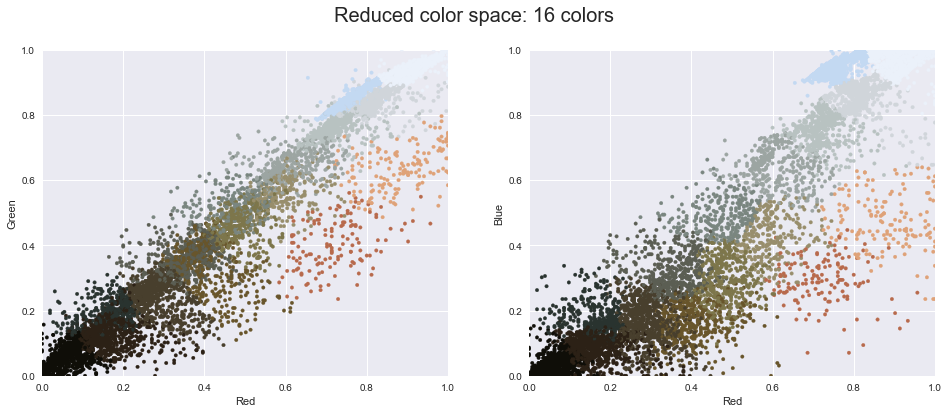

In [9]:
# Now let's reduce these 16 million colors to just 16 colors, 
# using a k-means clustering across the pixel space. 
# Because we are dealing with a very large dataset, we will use the mini batch k-means.

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

Text(0.5,1,'16-color Image')

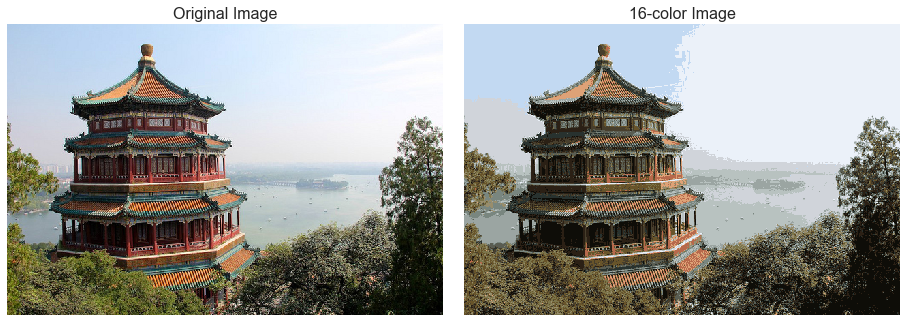

In [11]:
# The result is a re-coloring of the original pixels, 
# where each pixel is assigned the color of its closest cluster center. 
# Plotting these new colors in the image space rather than the pixel space 
# shows us the effect of this:

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

In [ ]:
# Some detail is certainly lost in the rightmost panel, 
# but the overall image is still easily recognizable. 